# Preprocessing Workflow


🎯 This exercise will guide you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

🌤 We stored the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) in the cloud.

👇 Run the code down below to load the dataset and features you will be working with.

In [1]:
import pandas as pd

# Loading the dataset
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
data = pd.read_csv(url)

# Selecting some columns of interest
selected_features = ['GrLivArea',
                     'BedroomAbvGr',
                     'KitchenAbvGr', 
                     'OverallCond',
                     'RoofSurface',
                     'GarageFinish',
                     'CentralAir',
                     'ChimneyStyle',
                     'MoSold',
                     'SalePrice']

# Overwriting the "data" variable to keep only the columns of interest
# Notice the .copy() to copy the values 
data = data[selected_features].copy()

# Showing the first five rows
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


📚 Take the time to do a ***preliminary investigation*** of the features by reading the ***dataset description*** available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to refer to it throughout the day.

## (1) Duplicates

ℹ️ ***Duplicates in datasets cause data leakage.*** 

👉 It is important to locate and remove duplicates.

❓ How many duplicated rows are there in the dataset ❓

<i>Save your answer under variable name `duplicate_count`.</i>

In [2]:
duplicate_count = data.duplicated().sum()
duplicate_count

300

❓ Remove the duplicates from the dataset. Overwite the dataframe `data`❓

In [3]:
data = data.drop_duplicates()

🧪 **Test your code**

In [4]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/sho/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/sho/code/omotoshohei/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_duplicates.py::TestDuplicates::test_dataset_length PASSED           [ 50%]
test_duplicates.py::TestDuplicates::test_duplicate_count PASSED          [100%]

============================== 2 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master



## (2) Missing data

❓ Print the percentage of missing values for every column of the dataframe. ❓

In [5]:
data.isnull().sum().sort_values(ascending=False)

GarageFinish    81
RoofSurface      9
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
OverallCond      0
CentralAir       0
ChimneyStyle     0
MoSold           0
SalePrice        0
dtype: int64

In [6]:
data.isnull().sum().sort_values(ascending=False) / len(data)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

### `GarageFinish`

❓ **Questions** about `GarageFinish` ❓

Investigate the missing values in `GarageFinish`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [7]:
data["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [8]:
# Chose "Preserve the NaNs and replace them with meaningful values" and replace by unknown
import numpy as np

data.GarageFinish.replace(np.nan, "Unknown", inplace=True) #Replace NaN by "Unknown"
data.GarageFinish.value_counts() #Check count of each category

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

### `RoofSurface`

❓ **Questions** about `RoofSurface` ❓

Investigate the missing values in `RoofSurface`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using sklearn's `SimpleImputer`
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [9]:
data["RoofSurface"].head()

0    1995.0
1     874.0
2    1593.0
3    2566.0
4    3130.0
Name: RoofSurface, dtype: float64

In [10]:
import numpy as np

# Option 2: Replace missing Pesos values with mean
# data.RoofSurface.replace(, data.RoofSurface.mean())
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="median") 

# Call the "fit" method on the object
imputer.fit(data[['RoofSurface']]) 

# Call the "transform" method on the object
data['RoofSurface'] = imputer.transform(data[['RoofSurface']]) 

# The mean is stored in the transformer's memory
imputer.statistics_

array([2906.])

In [11]:
data["RoofSurface"].isnull().sum()

0

### `ChimneyStyle`

❓ **Questions** about `ChimneyStyle` ❓

Investigate the missing values in `ChimneyStyle`. Then, choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 <i>Hint</i></summary>
    
* ⚠️ Be careful: not all missing values are represented as `np.nans`, and Python's `isnull()` only detects `np.nans`...
    
* ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
    

</details>

In [12]:
data["ChimneyStyle"].unique()

array(['bricks', 'castiron', '?'], dtype=object)

In [13]:
data.ChimneyStyle.value_counts()#Check count of each category

?           1455
bricks         3
castiron       2
Name: ChimneyStyle, dtype: int64

In [14]:
data.drop(columns='ChimneyStyle', inplace=True) # Drop column 

🧪 **Test your code**

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/sho/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/sho/code/omotoshohei/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_nans PASSED             [ 50%]
test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



❓ When you are done with handling missing value, print out the percentage of missing values for the entire dataframe ❓

You should no longer have missing values !

In [16]:
data.isnull().sum().sort_values(ascending=False)

GrLivArea       0
BedroomAbvGr    0
KitchenAbvGr    0
OverallCond     0
RoofSurface     0
GarageFinish    0
CentralAir      0
MoSold          0
SalePrice       0
dtype: int64

## (3) Scaling

**First of all, before scaling...**

To understand the effects of scaling and encoding on model performance, let's get a **base score without any data transformation**.

❓ Cross-validate a linear regression model that predicts `SalePrice` using the other features ❓

⚠️ Note that a linear regression model can only handle numeric features. [DataFrame.select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) can help.

In [17]:
data.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'RoofSurface', 'GarageFinish', 'CentralAir', 'MoSold', 'SalePrice'],
      dtype='object')

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Instantiate model
model = LinearRegression()

#ターゲット（予測したい値：y）と影響を与える項目（変数：x）を読み込む
X = data[["RoofSurface"]]
y = data["SalePrice"]

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']

# Mean of scores
cv_results['test_score'].mean()

-0.005043569991739249

Keep this score in mind! You will train a new model after data preprocessing in Challenge #2 - see if it improves your average score 😉

🚀 Now, back to **feature scaling**!

###  `RoofSurface` 

❓ **Question** about `RoofSurface` ❓

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

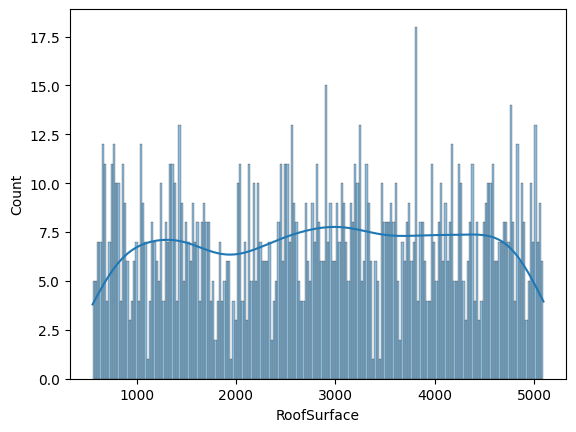

In [19]:
import seaborn as sns
sns.histplot(data['RoofSurface'], bins=200,kde = True);

<AxesSubplot:xlabel='RoofSurface'>

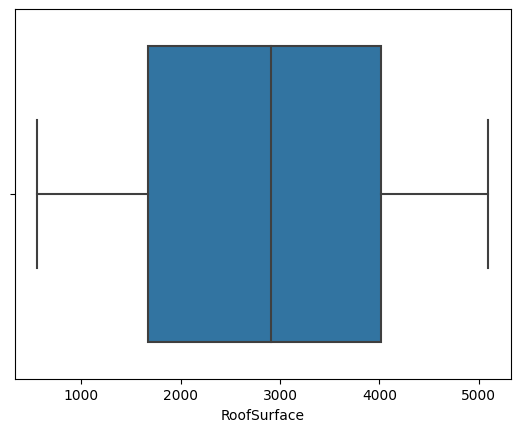

In [20]:
sns.boxplot(data=data, x='RoofSurface')

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Step 0 - Instantiate MinMax Scaler
minmax_scaler = MinMaxScaler()

# Step 1- Fit the scaler to `RoofSurface` to "learn" the min and max values
minmax_scaler.fit(data[['RoofSurface']])

# Step 2 - Scale/Transform: apply the MinMax transformation for every house
data['RoofSurface'] = minmax_scaler.transform(data[['RoofSurface']])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ Since `RoofSurface` has neither a Gaussian distribution, nor outliers $\rightarrow$ MinMaxScaler.
</details>

### `GrLivArea`

❓ **Question** about `GrLivArea` ❓

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scaler
2. Robust Scaler
3. MinMax Scaler

Replace the original columns with the transformed values.

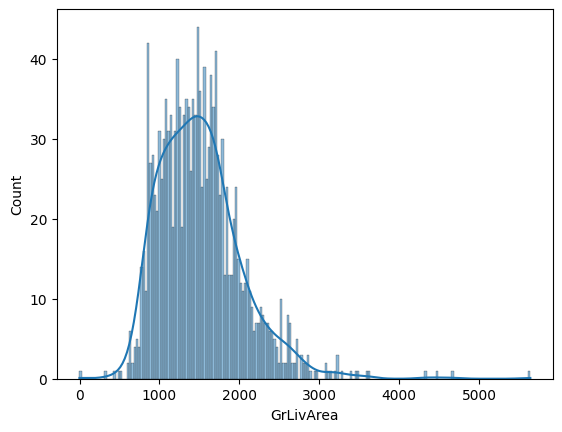

In [22]:
import seaborn as sns
sns.histplot(data['GrLivArea'], bins=200,kde = True);

<AxesSubplot:xlabel='GrLivArea'>

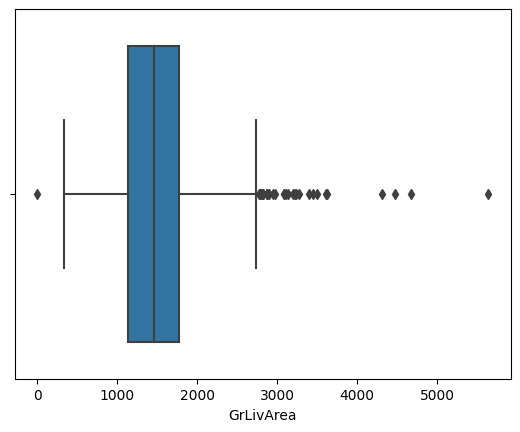

In [23]:
sns.boxplot(data=data, x='GrLivArea')

In [24]:
from sklearn.preprocessing import RobustScaler

# Step 0 - Instanciate Robust Scaler

rb_scaler = RobustScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

rb_scaler.fit(data[['GrLivArea']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

data['GrLivArea'] = rb_scaler.transform(data[['GrLivArea']]) 

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `GrLivArea` has many outliers $\rightarrow$ RobustScaler()
</details>

### `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

❓ **Questions** about `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr` ❓

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scaler
2. Standard Scaler
3. Robust Scaler

Replace the original columns with the transformed values.

<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features. There are less than 0.1% of outliers so no need to use _RobustScaler()_. The distribution is not Gaussian, hence no _StandardScaler()_. By elimination, you can confidently choose _MinMaxScaler()_.
</details>

In [25]:
data.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,2.866438,1.046575,5.575342,0.508148,6.321918,180921.195890
std,0.813952,0.815778,0.220338,1.112799,0.291583,2.703626,79442.502883
min,-2.263422,0.000000,0.000000,1.000000,0.000000,1.000000,34900.000000
25%,-0.516802,2.000000,1.000000,5.000000,0.246143,5.000000,129975.000000
50%,0.000000,3.000000,1.000000,5.000000,0.517523,6.000000,163000.000000
75%,0.483198,3.000000,1.000000,6.000000,0.761406,8.000000,214000.000000
max,6.455002,8.000000,3.000000,9.000000,1.000000,12.000000,755000.000000


In [26]:
data['BedroomAbvGr']

0       3
1       3
2       3
3       3
4       4
       ..
1455    3
1456    3
1457    4
1458    2
1459    3
Name: BedroomAbvGr, Length: 1460, dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Step 0 - Instantiate MinMax Scaler
minmax_scaler = MinMaxScaler()

# Step 1 - Fit the scaler to `BedroomAbvGr`, `OverallCond`, and `KitchenAbvGr`
minmax_scaler.fit(data[['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']])

# Step 2 - Scale/Transform: apply the MinMax transformation for every house
transformed_data = minmax_scaler.transform(data[['BedroomAbvGr', 'OverallCond', 'KitchenAbvGr']])

# Correctly replace the original columns with the transformed values
data['BedroomAbvGr'] = transformed_data[:, 0]
data['OverallCond'] = transformed_data[:, 1]
data['KitchenAbvGr'] = transformed_data[:, 2]

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000


🧪 **Test your code**

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/sho/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/sho/code/omotoshohei/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED      [ 33%]
test_scaling.py::TestScaling::test_gr_liv_area PASSED                    [ 66%]
test_scaling.py::TestScaling::test_roof_surface PASSED                   [100%]

============================== 3 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Feature Encoding

### `GarageFinish`

❓ **Question** about `GarageFinish`❓

👇 Investigate `GarageFinish` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 <i>Hint</i></summary>
        
ℹ️ `GarageFinish` is a multicategorical feature that should be One-hot-encoded. You could also consider an Ordinal Encoding but we would have to know for sure that Unfinished or no garage are definitely worse that rough finished!
</details>

In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(data[['GarageFinish']]) 

# Transform the current "Street" column
data[ohe.get_feature_names_out()] = ohe.transform(data[['GarageFinish']])

# Drop the column "Street" which has been encoded
data.drop(columns = ["GarageFinish"], inplace = True)

# Show the dataset
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown
0,0.380070,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,1.0,0.0,0.0


In [30]:
ohe.get_feature_names_out()

array(['GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageFinish_Unknown'], dtype=object)

In [31]:
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown
0,0.380070,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,1.0,0.0,0.0


### Encoding  `CentralAir`

❓ **Question** about `CentralAir`❓

Investigate `CentralAir` and choose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column with the newly generated encoded columns.


<details>
    <summary>💡 <i>Hint</i></summary>
    
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [32]:
data["CentralAir"].unique()

array(['Y', 'N'], dtype=object)

In [34]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the Ordinal Encoder
ordinal_encoder = OneHotEncoder(sparse = False, drop="if_binary")

# Fit it
ordinal_encoder.fit(data[["CentralAir"]])

# Display the learned categories
display(ordinal_encoder.categories_)

/Users/sho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['N', 'Y'], dtype=object)]

In [40]:
# Transforming categories into ordered numbers
data[ordinal_encoder.get_feature_names_out()] = ordinal_encoder.transform(data[["CentralAir"]])

# Drop the original MoSold column
data.drop(columns=['CentralAir'], inplace=True)

# Showing the transformed classes
data

KeyError: "None of [Index(['CentralAir'], dtype='object')] are in the [columns]"

In [44]:
data.rename(columns={"CentralAir_Y":"CentralAir"}, inplace=True)

In [45]:
data


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,SalePrice,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,CentralAir,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,208500,0.0,1.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,181500,0.0,1.0,0.0,0.0,1.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,223500,0.0,1.0,0.0,0.0,1.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,140000,0.0,0.0,1.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,250000,0.0,1.0,0.0,0.0,1.0,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,175000,0.0,1.0,0.0,0.0,1.0,-8.660254e-01,-5.000000e-01
1456,0.940904,0.375,0.333333,0.625,0.459996,210000,0.0,0.0,1.0,0.0,1.0,8.660254e-01,5.000000e-01
1457,1.353418,0.500,0.333333,1.000,0.036147,266500,0.0,1.0,0.0,0.0,1.0,5.000000e-01,-8.660254e-01
1458,-0.596369,0.250,0.333333,0.625,0.648667,142125,0.0,0.0,1.0,0.0,1.0,8.660254e-01,-5.000000e-01


## (5) Feature Engineering

### `MoSold` - Cyclical engineering 

👨🏻‍🏫 A feature can be numerical (continuous or discrete), categorical or ordinal. But a feature can also be temporal (e.g. quarters, months, days, minutes, ...). 

Cyclical features like time need some specific preprocessing. Indeed, if you want any Machine Learning algorithm to capture this cyclicity, your cyclical features must be preprocessed in a certain way.

👉 Consider the feature `MoSold`, the month on which the house was sold.

In [36]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,MoSold,SalePrice,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,CentralAir_Y
0,0.380070,0.375,0.333333,0.500,0.316729,2,208500,0.0,1.0,0.0,0.0,1.0
1,-0.312090,0.375,0.333333,0.875,0.069650,5,181500,0.0,1.0,0.0,0.0,1.0
2,0.497489,0.375,0.333333,0.500,0.228124,9,223500,0.0,1.0,0.0,0.0,1.0
3,0.390885,0.375,0.333333,0.500,0.442583,2,140000,0.0,0.0,1.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,12,250000,0.0,1.0,0.0,0.0,1.0


In [37]:
data["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

* Many houses were sold in June (6), July (7) and May (5) (Spring/Summer)
* Only a few houses were sold in December (12), January (1) and February (2) (~ Fall/Winter)
    * But for any Machine Learning model, there is no reason why December (12) and January (1) would be "close"...

👩🏻‍🏫 ***How to deal with cyclical features?***

1.  Look at the following illustration and read the explanations to distinguish two different months.

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cyclical_feature_engineering.png" alt="Cyclical features" width="1000">


2. Read this [article](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/) for more details.




❓ **Question** about `MoSold` ❓ 
- Create two new features `sin_MoSold` and `cos_MoSold` which correspond respectively to the sine and cosine of MoSold.
- Drop the original column `MoSold`

<details>
    <summary>💡 <i>Hint</i></summary>
    
To create a time engineered feature based on a column which gives the second in the day!
```python
seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*df.seconds/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*df.seconds/seconds_in_day)
df.drop(columns=['seconds'], inplace=True)

df.head()
```


</details>

In [38]:
import numpy as np

# Assuming there are 12 months in a year
months_in_year = 12

# Create cyclical features for MoSold
data['sin_MoSold'] = np.sin(2 * np.pi * data['MoSold'] / months_in_year)
data['cos_MoSold'] = np.cos(2 * np.pi * data['MoSold'] / months_in_year)

# Drop the original MoSold column
data.drop(columns=['MoSold'], inplace=True)

# Display the first few rows of the DataFrame to check the new features
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,SalePrice,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,CentralAir_Y,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,208500,0.0,1.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,181500,0.0,1.0,0.0,0.0,1.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,223500,0.0,1.0,0.0,0.0,1.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,140000,0.0,0.0,1.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,250000,0.0,1.0,0.0,0.0,1.0,-2.449294e-16,1.000000e+00


🧪 **Test your code**

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/sho/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/sho/code/omotoshohei/05-ML/02-Prepare-the-dataset/data-preprocessing-workflow/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_central_air PASSED                  [ 25%]
test_encoding.py::TestEncoding::test_columns PASSED                      [ 50%]
test_encoding.py::TestEncoding::test_month_sold_features PASSED          [ 75%]
test_encoding.py::TestEncoding::test_month_sold_features_number PASSED   [100%]

============================== 4 passed in 0.33s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



# (6) Export the preprocessed dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [48]:
data.to_csv("data/clean_dataset.csv", index=False)

🏁 Congratulations! Now, you know how to ***preprocess a dataset*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!